# Linear Regression
In this notebook, we are going to cover the concept of linear regression in 3 ways. The first 2 methods are case of simple Linear Regression and 3rd case is for multiple Linear Regression.

- Evaluation of parameters using the formula's of Cov(X, Y) and Var(X)
- Use of matrix for evaluating the parameters.
- Multiple Linear Regression is solved with Statsmodels package and Stochastic Gradient Descent.


In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

In [0]:
# Creating a dummy dataset
x=np.arange(30)
y = [39343,46205,37731,43525,39891,56642,60150,54445,64445,57189,63218,55794,56957,57081,61111,67938,66029,83088,81363,93940,91738,98273,101302,113812,109431,105582,116969,112635,122391,121872]


In [0]:
## Getting correlation of the data
data=pd.DataFrame()
data['x']=x
data['y']=y
data.corr()

,x,y
x,1.000000,0.960826
y,0.960826,1.000000


## 1) Linear Regression - Code from scratch
Evaluation of parameters using the formula's of Cov(X, Y) and Var(X).

32617.85161290323 2992.0791991101223


Text(0.5, 1.0, 'Actual vs. Predicted')

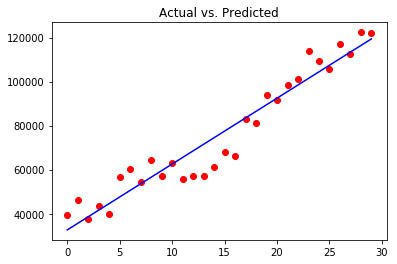

In [0]:
# Evaluating the parameters beta0 and beta1
beta1 = np.sum((x - np.mean(x))*(y - np.mean(y)))/np.sum((x - np.mean(x))**2)
beta0 = np.mean(y) - beta1*np.mean(x)
print(beta0, beta1)
y_pred = beta0 + beta1*x

plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'blue')
plt.title('Actual vs. Predicted')

## 2) Alternative Approach by solving the matrix
### Do not edit this cell as it contains equations typed in LaTex by hand.

$\beta_1 = \sum_{i=1}^{n} \frac{(x_i-\bar{x})(y_i-\bar{y})}{(x_i-\bar{x})^{2}}$ and $\beta_0 = \bar{y}-\beta_1\bar{x}$

Solving formula of $\beta_1$

### $\beta_1 = \sum_{i=1}^{n} \frac{x_iy_i-x_i\bar{y} - y_i\bar{x}+\bar{x}\bar{y}}{(x_i-\bar{x})^{2}}$

$\beta_1\sum_{i=1}^{n}(x_i^2 +\bar{x}^{2} - 2x_i\bar{x}) = \sum_{i=1}^{n}x_iy_i - \bar{y}\sum_{i=1}^{n}x_i - \bar{x}\sum_{i=1}^{n}y_i + n\bar{x}\bar{y}$

$\beta_1(\sum_{i=1}^{n}x_i^2 - n\bar{x}^2) = \sum_{i=1}^{n}x_iy_i - \bar{y}n\bar{x} - \bar{x}n\bar{y} + n\bar{x}\bar{y}$

$\beta_1(\sum_{i=1}^{n}x_i^2 - n\bar{x}^2) = \sum_{i=1}^{n}x_iy_i - n\bar{x}\bar{y}$

### $\beta_1 = \frac{\sum_{i=1}^{n}x_iy_i - n\bar{x}\bar{y}}{(\sum_{i=1}^{n}x_i^2 - n\bar{x}^2)}$

Similarly, 

### $\beta_0 = \frac{\bar{y}\sum_{i = 1}^{n}x_i^2 - \bar{x}\sum_{i=1}^{n}x_iy_i}{\sum_{i=1}^{n}x_i^2 - n\bar{x}^2}$

The above results can also be obtained by solving the linear equations

$(\sum_{i = 1}^{n}x_i)\beta_1 + n\beta_0 = \sum_{i = 1}^{n}y_i$

$(\sum_{i = 1}^{n}x_i^2)\beta_1 + (\sum_{i = 1}^{n}x_i)\beta_0 = \sum_{i = 1}^{n}x_iy_i$



In [0]:
def get_sum(l, p):
    result = 0
    for i in l:
        result += i**p
    return result

def get_mul(l1, l2):
    result2 = 0
    for i in range(len(l1)):
        result2 += (l1[i]*l2[i])
    return result2

def solve_eqn(sum_x, sum_x2, sum_y, sum_xy):
    n = len(x)
    p = np.array([[n, sum_x], [sum_x, sum_x2]])
    q = np.array([sum_y, sum_xy])
    res = np.linalg.solve(p, q)
    return res

def predict(x, res):
    y_pred = []
    for i in x:
        y_pred.append(res[0] + res[1]*i)
    return y_pred

In [0]:
sum_x = get_sum(x, 1)
sum_y = get_sum(y, 1)
sum_x2 = get_sum(x, 2)
sum_xy = get_mul(x, y)
result = solve_eqn(sum_x, sum_x2, sum_y, sum_xy)
y_pred = predict(x, result)

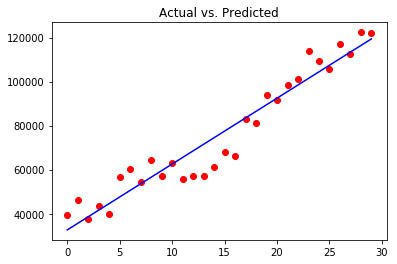

In [0]:
df=pd.DataFrame()
df['actual']=y
df['predicted']=y_pred

plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'blue')
plt.title('Actual vs. Predicted')
#plt.xlabel('X')
#plt.ylabel('Y')
plt.show()

## 3) Multiple Linear Regression using Statsmodels package


**Loading the Boston Housing Dataset**

In [0]:
from sklearn.datasets import load_boston
# loading the dataset
boston_dataset = load_boston()

# Getting the keys of the data to understand the dataset better
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


**Getting info about the dataset**

In [0]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**There are 506 observations and 13 predictors. MEDV is the target variable and we are adding that to our dataset. We will also take a look at first 5 observations**

In [0]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Look for any missing values in the data.**

In [0]:
boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

### **Exploratory Data Analysis**

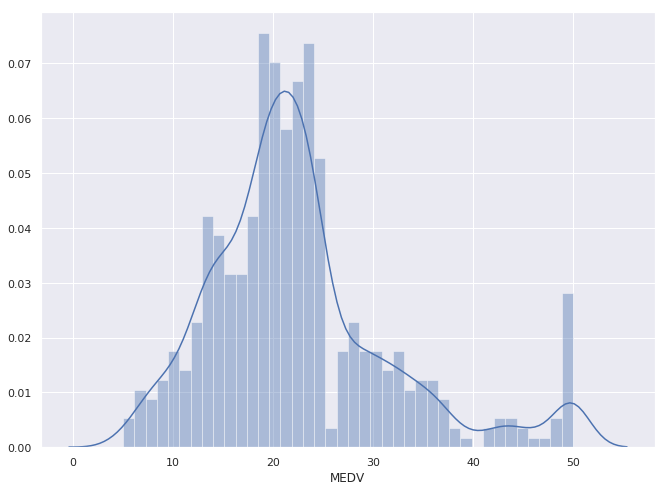

In [0]:
sns.set(rc={'figure.figsize':(11,8)})

sns.distplot(boston['MEDV'], bins=40)
plt.show()

* The Value of target variable is normally distributed with few outliers.

* Looking for the correlation between the predictors with the help of correlation matrix

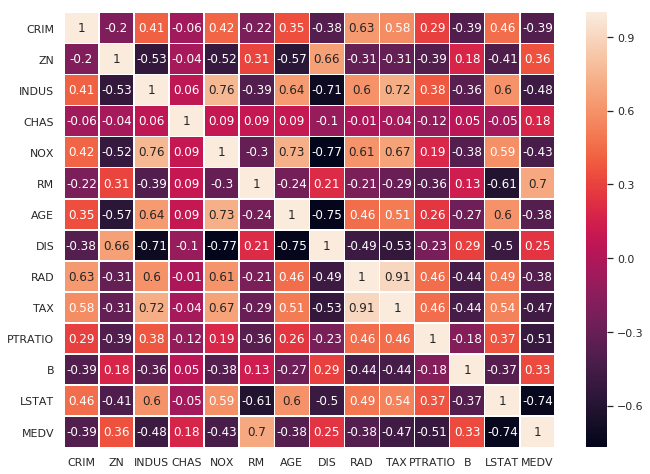

In [0]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, linewidths = 0.5)

* From Correlation matrix, it can be seen that MEDV is related to INDUS, NOX, RM, TAX, PTRATIO, LSTAT. 

* RAD and TAX are highly correlated to each other, so will use only one of them. INDUS is related to TAX, RAD and NOX, LSTAT is related to RM. 

**Model 1** : 

Based on highest values of MEDV in correlation matrix. 

From the correlation matrix, it can be easily viewed that MEDV is highly positively related to RM while highly negatively related to LSTAT. They are also negatively correlated to each other. Let's begin prediction of MEDV with these 2 features.

In [0]:
# Concatenating the 2 predictors in one dataframe.
X = boston[['RM', 'LSTAT']]
Y = boston['MEDV']


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
# Splitting the dataset, 80% of data goes into training set and 20% into test test. Set the seed to 5 for reproducibility.

Checking the size of all the sets created above.

In [0]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


**Training the model with the help of statsmodels Ordinary Least Squares (OLS)**

In [0]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()

# Print out the statistics
print(model.summary())

 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     341.5
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           2.55e-87
Time:                        08:53:23   Log-Likelihood:                -1271.9
No. Observations:                 404   AIC:                             2550.
Df Residuals:                     401   BIC:                             2562.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7362      3.547      0.771      0.4

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Making predictions on the training and test set**

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
X_test = sm.add_constant(X_test)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Evaluating Root Mean Square Error
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print('The RMSE is: {}'.format(rmse_train))

rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print('The RMSE is: {}'.format(rmse))

# Evaluating R squared
r2_train = r2_score(Y_train, Y_train_pred)
print('The r square is:{}'.format(r2_train))

r2 = r2_score(Y_test, Y_test_pred)
print('The r square is:{}'.format(r2))


The RMSE is: 5.6371293350711955
The RMSE is: 5.13740078470291
The r square is:0.6300745149331701
The r square is:0.6628996975186954


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Variance Inflation Factor (VIF)

Variation Inflation Factor detects multicollinearity in regression analysis i.e., the predictors are correlated to each other. The VIF estimates how much inflation is induced in the variance of the regression coefficient due to multicollinearity.

VIF's are calculated by regressing a predictor against every other predictor in the model. R-squared values are evaluated and then for ith predictor plugged into the formula given by

### $ VIF = \frac {1}{1-R_i^2}$

As we can see from the formula that VIF is always greater than 1. The value of VIF tells us the percentage of inflation in the variance for each coefficient. 

For example, if VIF = 1.9, it means that the variance of a particular coefficient is 90% bigger than the value expected if there is no multicollinearity.

Generally, for interpreting Variance Inflation Factor
- 1 means that the predictors are not correlated.
- From 1 to 10 means that the predictors are moderately correlated. 
- Greater than 10 means that the predictors are highly correlated.

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(X.columns)):
  v = vif(np.matrix(X), i)
  print('Variation Inflation Factor for {}: {}'.format(X.columns[i], round(v, 2)) )

Variation Inflation Factor for RM: 3.25
Variation Inflation Factor for LSTAT: 3.25


**Model 2**: 

Taking all the predictors

In [0]:
# Concatenating the predictors in one dataframe.
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
Y = boston['MEDV']


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
# Splitting the dataset, 80% of data goes into training set and 20% into test test. Set the seed to 5 for reproducibility.

**Creating Prediction Model**

In [0]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model1 = sm.OLS(Y_train, X_train).fit()

# Print out the statistics
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     84.65
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          8.21e-105
Time:                        08:53:24   Log-Likelihood:                -1202.0
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     390   BIC:                             2488.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9125      5.775      6.565      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Predict the y values of training and test set**

In [0]:
X_test = sm.add_constant(X_test)
Y_train_pred = model1.predict(X_train)
Y_test_pred = model1.predict(X_test)

# Evaluating Root Mean Square Error
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print('The RMSE is: {}'.format(rmse_train))

rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print('The RMSE is: {}'.format(rmse))

# Evaluating R squared
r2_train = r2_score(Y_train, Y_train_pred)
print('The r square is:{}'.format(r2_train))

r2 = r2_score(Y_test, Y_test_pred)
print('The r square is:{}'.format(r2))

The RMSE is: 4.741000992236517
The RMSE is: 4.568292042303224
The r square is:0.7383393920590519
The r square is:0.7334492147453058


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### **Variance Inflation Factors**

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(X.columns)):
  v = vif(np.matrix(X), i)
  print('Variation Inflation Factor for {}: {}'.format(X.columns[i], round(v, 2)) )

Variation Inflation Factor for CRIM: 2.1
Variation Inflation Factor for ZN: 2.84
Variation Inflation Factor for INDUS: 14.49
Variation Inflation Factor for CHAS: 1.15
Variation Inflation Factor for NOX: 73.89
Variation Inflation Factor for RM: 77.95
Variation Inflation Factor for AGE: 21.39
Variation Inflation Factor for DIS: 14.7
Variation Inflation Factor for RAD: 15.17
Variation Inflation Factor for TAX: 61.23
Variation Inflation Factor for PTRATIO: 85.03
Variation Inflation Factor for B: 20.1
Variation Inflation Factor for LSTAT: 11.1


**Model 3** : 

Taking CRIM, ZN, INDUS, CHAS, DIS, RAD, LSTAT, RM as our predictors.

In [0]:
# Concatenating the predictors in one dataframe.
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
X = X.drop(['NOX', 'PTRATIO', 'TAX', 'AGE', 'B'], axis = 1)
Y = boston['MEDV']


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
# Splitting the dataset, 80% of data goes into training set and 20% into test test. Set the seed to 5 for reproducibility.

**Creating prediction model** 

In [0]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model1 = sm.OLS(Y_train, X_train).fit()

# Print out the statistics
print(model1.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     110.1
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.18e-95
Time:                        08:53:24   Log-Likelihood:                -1236.0
No. Observations:                 404   AIC:                             2490.
Df Residuals:                     395   BIC:                             2526.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7647      3.848      3.836      0.0

**Predict the y values of training and test set**

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
X_test = sm.add_constant(X_test)
Y_train_pred = model1.predict(X_train)
Y_test_pred = model1.predict(X_test)

# Evaluating Root Mean Square Error
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print('The RMSE is: {}'.format(rmse_train))

rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print('The RMSE is: {}'.format(rmse))

# Evaluating R squared
r2_train = r2_score(Y_train, Y_train_pred)
print('The r square is:{}'.format(r2_train))

r2 = r2_score(Y_test, Y_test_pred)
print('The r square is:{}'.format(r2))

The RMSE is: 5.156983573659251
The RMSE is: 4.870572901746912
The r square is:0.6904079857277586
The r square is:0.6970071758643983


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### **Variance Inflation Factors**

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(X.columns)):
  v = vif(np.matrix(X), i)
  print('Variation Inflation Factor for {}: {}'.format(X.columns[i], round(v, 2)) )

Variation Inflation Factor for CRIM: 2.07
Variation Inflation Factor for ZN: 2.3
Variation Inflation Factor for INDUS: 9.01
Variation Inflation Factor for CHAS: 1.11
Variation Inflation Factor for RM: 15.36
Variation Inflation Factor for DIS: 9.39
Variation Inflation Factor for RAD: 4.78
Variation Inflation Factor for LSTAT: 6.77


### Homework Assignment

Create 2 models using the Diabetes dataset from Scikit Learn Package.
- 1st model must contain all the predictors
- 2nd model can contain fewer predictors by analyzining concepts like VIF, Correlation Matrix.

**Points to focus**

Data Should be splitted into test and train set in both the models.
Correlation heatmap must be shown.
R-squared, RMSE, intercept and coefficients must be explicitly presented.

In [0]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)